# Coordinate Frames

In [80]:
>>> from astropy import units as u
>>> from astropy.coordinates import SkyCoord
>>> c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

In [12]:
>>> c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc, frame='icrs')
>>> c_icrs.heliocentrictrueecliptic

<SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, kpc)
    (27.8454028, 33.34902268, 770.)>

### to_cartesian(): Convert the representation to its Cartesian form.

Note that any differentials get dropped. Also note that orientation information at the origin is not preserved by conversions through Cartesian coordinates. For example, transforming an angular position defined at distance=0 through cartesian coordinates and back will lose the original angular coordinates:

Note that any differentials get dropped. Also note that orientation information at the origin is not preserved by conversions through Cartesian coordinates. For example, transforming an angular position defined at distance=0 through cartesian coordinates and back will lose the original angular coordinates:

In [20]:
>>> import astropy.units as u
>>> import astropy.coordinates as coord
>>> rep = coord.SphericalRepresentation(
...     lon=15*u.deg,
...     lat=-11*u.deg,
...     distance=70*u.pc)
>>> rep.to_cartesian().represent_as(coord.SphericalRepresentation)

<SphericalRepresentation (lon, lat, distance) in (rad, rad, pc)
    (0.26179939, -0.19198622, 70.)>

### Transform the cartesian coordinates using a 3x3 matrix.

This returns a new representation and does not modify the original one. Any differentials attached to this representation will also be transformed.

We can start off by creating a cartesian representation object:

In [21]:
from astropy import units as u

from astropy.coordinates import CartesianRepresentation

rep = CartesianRepresentation([1, 2] * u.pc,

                              [2, 3] * u.pc,

                              [3, 4] * u.pc)

We now create a rotation matrix around the z axis:

In [22]:
from astropy.coordinates.matrix_utilities import rotation_matrix

rotation = rotation_matrix(30 * u.deg, axis='z')

Finally, we can apply this transformation:

In [23]:
rep_new = rep.transform(rotation)

rep_new.xyz  

<Quantity [[1.8660254 , 3.23205081],
           [1.23205081, 1.59807621],
           [3.        , 4.        ]] pc>

In [ ]:
gc.transform_to

In [81]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)
print("Cartesian X =",c.cartesian.x)
print("Cartesian Y =",c.cartesian.y)
print("Cartesian Z =",c.cartesian.z)

Cartesian X = 568.7128654235231 kpc
Cartesian Y = 107.3008974042025 kpc
Cartesian Z = 507.88994291875713 kpc


In [43]:
>>> c = SkyCoord(x=1, y=2, z=3, unit='kpc', representation_type='cartesian')
>>> c  

>>> c.x, c.y, c.z  

>>> c.representation_type = 'cylindrical'
>>> c  

<SkyCoord (ICRS): (rho, phi, z) in (kpc, deg, kpc)
    (2.23606798, 63.43494882, 3.)>

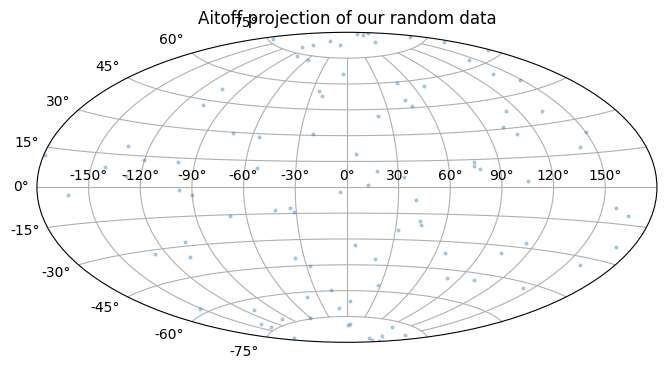

In [56]:
>>> import numpy as np
>>> ra_random = np.random.rand(100)*360.0 * u.degree
>>> dec_random = (np.random.rand(100)*180.0-90.0) * u.degree
>>> c = SkyCoord(ra=ra_random, dec=dec_random, frame='icrs')
>>> ra_rad = c.ra.wrap_at(180 * u.deg).radian
>>> dec_rad = c.dec.radian
# 
>>> import matplotlib.pyplot as plt
>>> plt.figure(figsize=(8,4.2))
>>> plt.subplot(111, projection="aitoff")
>>> plt.title("Aitoff projection of our random data")
>>> plt.grid(True)
>>> plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
>>> plt.subplots_adjust(top=0.95,bottom=0.0)
>>> plt.show()

In [71]:
>>> c = SkyCoord(x=568.7128654235231, y=107.3008974042025, z=507.88994291875713, unit='kpc', representation_type='cartesian')
>>> c  

<SkyCoord (ICRS): (x, y, z) in kpc
    (568.71286542, 107.3008974, 507.88994292)>

In [72]:
>>> c.representation_type = 'cylindrical'
>>> c  

<SkyCoord (ICRS): (rho, phi, z) in (kpc, deg, kpc)
    (578.74675453, 10.68458, 507.88994292)>

In [73]:
>>> c.phi.to(u.deg)  

<Angle 10.68458 deg>

In [74]:
>>> c.representation_type = 'spherical'
>>> c  

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (10.68458, 41.26917, 770.)>

In [79]:
>>> c.representation_type = 'physicsspherical'
>>> c  

<SkyCoord (ICRS): (phi, theta, r) in (deg, deg, kpc)
    (10.68458, 48.73083, 770.)>

In [75]:
>>> c.representation_type = 'wgs84geodetic'
>>> c  

<SkyCoord (ICRS): (lon, lat, height) in (deg, deg, m)
    (10.68458, 41.26917, 2.37597174e+22)>

In [76]:
>>> c.representation_type = 'wgs72geodetic'
>>> c  

<SkyCoord (ICRS): (lon, lat, height) in (deg, deg, m)
    (10.68458, 41.26917, 2.37597174e+22)>

In [77]:
>>> c.representation_type = 'grs80geodetic'
>>> c  

<SkyCoord (ICRS): (lon, lat, height) in (deg, deg, m)
    (10.68458, 41.26917, 2.37597174e+22)>

In [ ]:
V_p2 = V_Venus + v_infty2_V